In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [263]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [264]:
# Quickly check to see the size of our DF, both rows and columns
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [265]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [266]:
# your code here
df[(df['_STATE'] == 34) | (df['_STATE'] == 36) | (df['_STATE'] == 9)]

#could also do 

df = df[df['_STATE'].isin([9,34,36])]

Now check to see how large our subset df.

In [267]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [268]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

In [269]:
df['PHYSHLTH'] = df['PHYSHLTH'].replace({88:0,77:np.nan,99:np.nan})
df = df.dropna(subset=['PHYSHLTH'])


In [270]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [271]:
#your code here
df['PHYSHLTH'].unique()

array([ 0.,  2., 28.,  5., 30.,  4.,  3., 15., 29.,  7., 10., 14.,  6.,
        1.,  8., 25., 20., 12., 18., 27., 21., 19., 22.,  9., 13., 17.,
       11., 16., 24., 26., 23.])

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [272]:
# descriptive statistics
df['PHYSHLTH'].describe()


count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

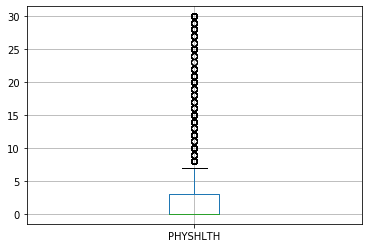

In [273]:
# graphic showing those descriptive stats
df.boxplot(column='PHYSHLTH')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15c530f60>]],
      dtype=object)

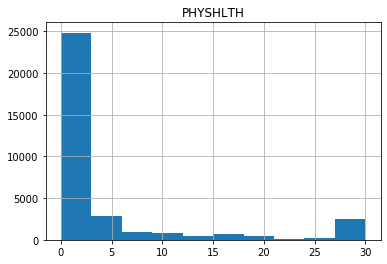

In [274]:
# graphic showing the distribution of data
df.hist(column='PHYSHLTH')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [275]:
# code to calculate the average number of sick days by state
grp = df.groupby('_STATE')['PHYSHLTH'].mean()

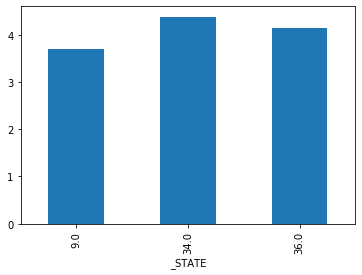

In [276]:
# code to graph those averages using matplotlib
grp.plot(kind='bar')

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [277]:
# code to create new colum for chronically sick
df['PHYSHLTH'].describe()
IQR = 3 - 0
outlier = df['PHYSHLTH'].mean() + (1.5*IQR)
outlier

df['chronicillness'] = np.where(df['PHYSHLTH'] > outlier,1,0)
df['chronicillness'].value_counts()

0    28655
1     5092
Name: chronicillness, dtype: int64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

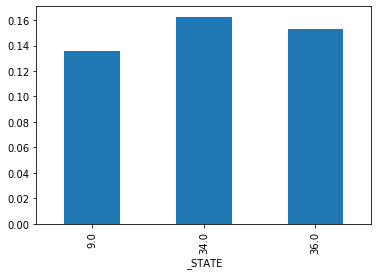

In [278]:
# code to calculate averages per state
df.groupby('_STATE')['chronicillness'].mean().plot(kind='bar')

In [279]:
# create graphic to compare chronically sick by state

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [280]:
df['SMOKDAY2'].describe()

count    13468.000000
mean         2.524206
std          0.843564
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: SMOKDAY2, dtype: float64

In [281]:
df['SMOKDAY2'].value_counts()
df['SMOKDAY2'] = df['SMOKDAY2'].replace({3:'Never Smokes',1:'always smokes',2:'sometimes smokes',7:np.nan,9:np.nan})
df['_STATE'] = df['_STATE'].replace({9:'CT',34:'NJ',36:'NY'})
df = df.dropna(subset=['SMOKDAY2'])
df['SMOKDAY2'].unique()

array(['Never Smokes', 'always smokes', 'sometimes smokes'], dtype=object)

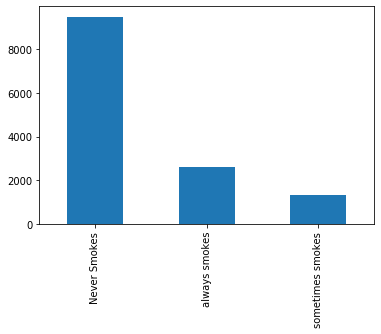

In [282]:
df['SMOKDAY2'].value_counts().plot(kind='bar')

<BarContainer object of 3 artists>

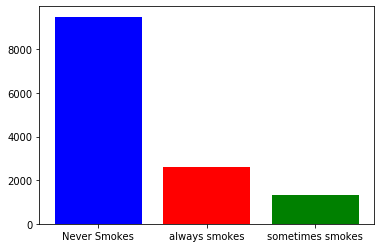

In [283]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(df['SMOKDAY2'].unique(),df['SMOKDAY2'].value_counts(),color=['blue','red','green'])


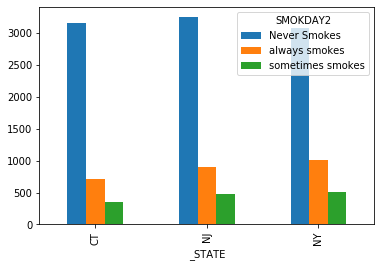

In [284]:
df.groupby('_STATE')['SMOKDAY2'].value_counts().unstack('SMOKDAY2').plot(kind='bar')

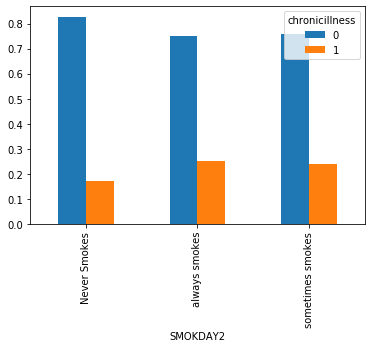

In [288]:
sick = df.groupby('SMOKDAY2')['chronicillness'].value_counts(normalize=True).unstack('chronicillness')
sick.plot(kind='bar')

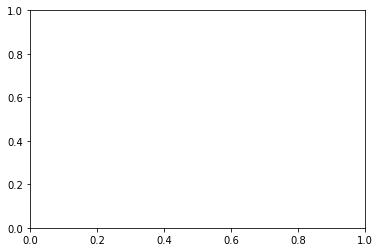

SMOKDAY2,Never Smokes,always smokes,sometimes smokes
_STATE,,,
CT,3166,706,344
NJ,3249,901,480
NY,3079,1004,512


## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [316]:
df_alco = df.copy()

In [322]:
df_alco['ALCDAY5'] = df_alco['ALCDAY5'].replace({888.0:0,777.0:np.nan, 999.0:np.nan})
df_alco = df_alco.dropna(subset=['ALCDAY5'])

In [323]:
df_alco['ALCDAY5'] = df_alco['ALCDAY5'].map(lambda x: x - 200 if x > 107 else ((x-100)*4 if x > 100 else x))

In [324]:
df_alco['ALCDAY5'].unique()

array([ 4., 30.,  0.,  2., 28.,  3., 14.,  7.,  8., 16., 29., 10., 20.,
       27., 12.,  1., 22., 15., 25.,  5.,  6., 13., 24., 21., 17., 19.,
        9., 26., 23., 18., 11.])

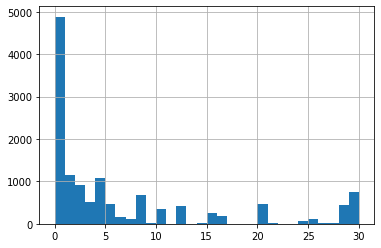

In [332]:
df_alco['ALCDAY5'].hist(bins=30)

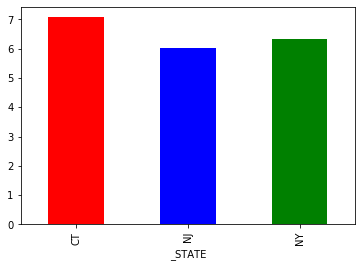

In [338]:
df_alco.groupby('_STATE')['ALCDAY5'].mean().plot(kind='bar',color = ['red','blue','green'])

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  